In [1]:
from datetime import datetime
from meteostat import Point, Daily
import pandas as pd

# 1. 대상 도시 설정 (예: 도쿄)
# 위도, 경도, 고도 입력
tokyo = Point(35.682839, 139.759455, 40)  # 도쿄의 위도, 경도, 해발고도

# 2. 데이터 기간 설정 (예: 2018년 ~ 2023년)
start = datetime(2018, 1, 1)
end = datetime(2023, 12, 31)

# 3. 일일 날씨 데이터 조회
data = Daily(tokyo, start, end)
data = data.fetch()

# 4. 데이터 확인 (기온, 강수량, 풍속 등 포함)
print(data.head())

# 5. CSV로 저장
data.to_csv('tokyo_weather_2018_2023.csv', encoding='utf-8-sig')


            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2018-01-01   7.0   0.2  12.8   0.0   NaN  330.0   9.5   NaN  1012.6   NaN
2018-01-02   5.7   0.6  10.6   0.0   NaN  311.0  11.8   NaN  1014.4   NaN
2018-01-03   4.1   2.7   8.4   0.0   NaN  319.0  18.7   NaN  1013.0   NaN
2018-01-04   4.7  -0.2   9.4   0.0   NaN  333.0  10.1   NaN  1018.0   NaN
2018-01-05   2.7   1.5   6.1   0.0   NaN   14.0   6.7   NaN  1015.6   NaN


In [2]:
from datetime import datetime
from meteostat import Point, Daily
import pandas as pd
import os

# 저장할 디렉토리 생성
os.makedirs('weather_data', exist_ok=True)

# 도시 목록과 좌표 정보
cities = {
    'tokyo': Point(35.6828, 139.7595, 40),
    'kyoto': Point(35.0116, 135.7681, 50),
    'brisbane': Point(-27.4698, 153.0251, 27),
    'sydney': Point(-33.8688, 151.2093, 58),
    'cebu': Point(10.3157, 123.8854, 5),
    'danang': Point(16.0544, 108.2022, 10)
}

# 날짜 범위 설정
start = datetime(2018, 1, 1)
end = datetime(2023, 12, 31)

# 도시별 데이터 수집
for name, location in cities.items():
    print(f"{name} 데이터 수집 중...")
    data = Daily(location, start, end).fetch()
    filename = f"weather_data/{name}_weather_2018_2023.csv"
    data.to_csv(filename, encoding='utf-8-sig')
    print(f"{name} 저장 완료 → {filename}")


tokyo 데이터 수집 중...
tokyo 저장 완료 → weather_data/tokyo_weather_2018_2023.csv
kyoto 데이터 수집 중...
kyoto 저장 완료 → weather_data/kyoto_weather_2018_2023.csv
brisbane 데이터 수집 중...
brisbane 저장 완료 → weather_data/brisbane_weather_2018_2023.csv
sydney 데이터 수집 중...
sydney 저장 완료 → weather_data/sydney_weather_2018_2023.csv
cebu 데이터 수집 중...
cebu 저장 완료 → weather_data/cebu_weather_2018_2023.csv
danang 데이터 수집 중...
danang 저장 완료 → weather_data/danang_weather_2018_2023.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# 1. 입력 폴더 경로 설정
input_folder = 'weather_data'
output_folder = 'weather_images'
os.makedirs(output_folder, exist_ok=True)

# 2. 이미지 크기 설정
cols_per_month = 30   # 가로: 한 달 30일 기준
rows_per_year = 12    # 세로: 12개월

# 3. 도시별 변환 시작
for file in os.listdir(input_folder):
    if file.endswith('.csv'):
        city_name = file.replace('_weather_2018_2023.csv', '')
        print(f"{city_name} 처리 중...")

        # 데이터 불러오기
        df = pd.read_csv(os.path.join(input_folder, file), parse_dates=['time'])
        df['year'] = df['time'].dt.year
        df['month'] = df['time'].dt.month
        df['day'] = df['time'].dt.day

        # 평균기온 기준, NaN 제거
        df = df[['year', 'month', 'day', 'tavg']].dropna()

        # 연도별 이미지 생성
        for year in sorted(df['year'].unique()):
            year_data = df[df['year'] == year]

            image_array = np.zeros((rows_per_year, cols_per_month))

            for month in range(1, 13):
                month_data = year_data[year_data['month'] == month]

                # 30일만 사용 (없는 날은 0으로 채움)
                temps = month_data['tavg'].values[:cols_per_month]
                padded = np.zeros(cols_per_month)
                padded[:len(temps)] = temps
                image_array[month - 1] = padded

            # 정규화 (0~255)
            norm = (image_array - image_array.min()) / (image_array.max() - image_array.min())
            image = (norm * 255).astype(np.uint8)

            # 이미지 저장
            im = Image.fromarray(image, mode='L')
            save_path = os.path.join(output_folder, f"{city_name}_{year}.png")
            im.save(save_path)
            print(f"{city_name} {year} 저장 완료 → {save_path}")


brisbane 처리 중...
brisbane 2018 저장 완료 → weather_images\brisbane_2018.png
brisbane 2019 저장 완료 → weather_images\brisbane_2019.png
brisbane 2020 저장 완료 → weather_images\brisbane_2020.png
brisbane 2021 저장 완료 → weather_images\brisbane_2021.png
brisbane 2022 저장 완료 → weather_images\brisbane_2022.png
brisbane 2023 저장 완료 → weather_images\brisbane_2023.png
cebu 처리 중...
cebu 2018 저장 완료 → weather_images\cebu_2018.png
cebu 2019 저장 완료 → weather_images\cebu_2019.png
cebu 2020 저장 완료 → weather_images\cebu_2020.png
cebu 2021 저장 완료 → weather_images\cebu_2021.png
cebu 2022 저장 완료 → weather_images\cebu_2022.png
cebu 2023 저장 완료 → weather_images\cebu_2023.png
danang 처리 중...
danang 2018 저장 완료 → weather_images\danang_2018.png
danang 2019 저장 완료 → weather_images\danang_2019.png
danang 2020 저장 완료 → weather_images\danang_2020.png
danang 2021 저장 완료 → weather_images\danang_2021.png
danang 2022 저장 완료 → weather_images\danang_2022.png
danang 2023 저장 완료 → weather_images\danang_2023.png
kyoto 처리 중...
kyoto 2018 저장 완료 → weat

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 입력 크기: 높이 12, 너비 30, 채널 1 (흑백 이미지)
input_shape = (12, 30, 1)

model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # 예시: 4개 클래스 (계절, 지역 등)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 12, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 6, 15, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 15, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1344)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        86,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,156 (410.77 KB)

 Trainable params: 105,156 (410.77 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import os
import pandas as pd

image_dir = 'weather_images'
label_file = 'labels.csv'

label_data = []

# 도시-계절 매핑 규칙 (연도 기준 3~5 봄, 6~8 여름, 9~11 가을, 나머지 겨울)
def get_season(month_avg_temp):
    if month_avg_temp >= 25:
        return 1  # 여름
    elif month_avg_temp >= 15:
        return 2  # 봄/가을
    else:
        return 0  # 겨울

for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        city, year_ext = filename.split('_')
        year = year_ext.replace('.png', '')

        # 간단히 도시 라벨링 (0: 도쿄, 1: 교토, 2: 브리즈번, ...)
        city_label_map = {
            'tokyo': 0, 'kyoto': 1, 'brisbane': 2,
            'sydney': 3, 'cebu': 4, 'danang': 5
        }

        city_label = city_label_map[city]

        # 도시만 라벨로 할 수도 있고, 계절 포함 라벨링도 가능 (조합해도 됨)
        label_data.append({
            'filename': filename,
            'city': city_label
            # 'season': season,  # 나중에 추가 가능
        })

df = pd.DataFrame(label_data)
df.to_csv(label_file, index=False)
print("labels.csv 저장 완료")


labels.csv 저장 완료


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import os

# 파라미터 설정
img_height, img_width = 12, 30
batch_size = 8

# 이미지와 라벨 불러오기
df = pd.read_csv('labels.csv')

# 폴더 경로 붙이기
df['filename'] = df['filename'].apply(lambda x: os.path.join('weather_images', x))

# 문자열 라벨 → 정수화
df['label'] = df['city'].astype(str)

# 데이터 분할
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# 이미지 로더 설정
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=True
)

val_gen = datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False
)

# CNN 모델 구성
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')  # 도시 라벨 6개
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습
history = model.fit(train_gen, validation_data=val_gen, epochs=100)

# 저장
model.save('weather_cnn_model.h5')


Found 28 validated image filenames belonging to 6 classes.
Found 8 validated image filenames belonging to 6 classes.
Epoch 1/100


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.1429 - loss: 1.8748 - val_accuracy: 0.2500 - val_loss: 1.8293
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1881 - loss: 1.8076 - val_accuracy: 0.1250 - val_loss: 1.7949
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2114 - loss: 1.7473 - val_accuracy: 0.1250 - val_loss: 1.7486
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1948 - loss: 1.7338 - val_accuracy: 0.3750 - val_loss: 1.7325
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4893 - loss: 1.7195 - val_accuracy: 0.3750 - val_loss: 1.6980
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5410 - loss: 1.6623 - val_accuracy: 0.3750 - val_loss: 1.6659
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5243 - loss: 1.6378 - val_accuracy: 0.3750 - val_loss: 1.6350
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4443 - loss: 1.5865 - val_accuracy: 0.3750 - val_loss: 1.5522
Epo

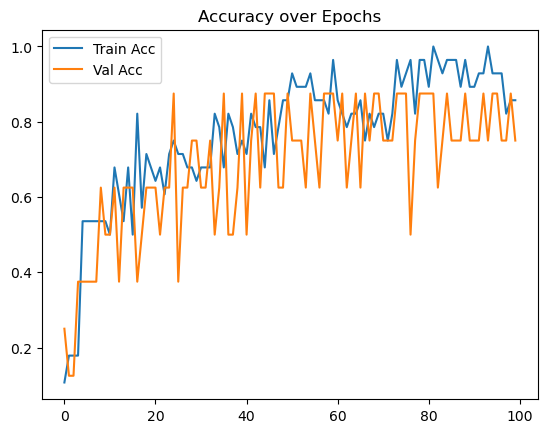

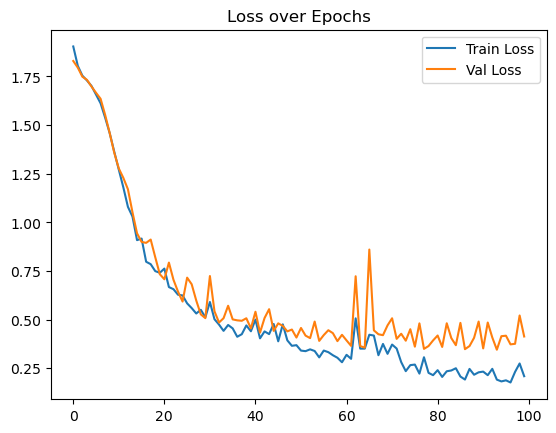

In [7]:
# 시각화
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


In [8]:
def recommend_outfit(temp):
    if temp >= 28:
        return "반팔, 민소매, 반바지, 모자, 선크림"
    elif 23 <= temp < 28:
        return "반팔, 얇은 긴팔, 얇은 긴 바지 or 반바지"
    elif 17 <= temp < 23:
        return "얇은 가디건, 후드, 맨투맨, 긴 바지"
    elif 12 <= temp < 17:
        return "니트, 자켓, 긴 바지"
    elif 6 <= temp < 12:
        return "코트, 니트, 머플러, 바람막이"
    else:
        return "두꺼운 패딩, 히트텍, 장갑, 목도리, 모자"


In [9]:
# 예시: 모델이 예측한 날씨 평균 기온이 25도일 때
temp = 25
print(f"{temp}도 → 추천 옷차림: {recommend_outfit(temp)}")


25도 → 추천 옷차림: 반팔, 얇은 긴팔, 얇은 긴 바지 or 반바지


In [10]:
import pandas as pd

# 도쿄 2019년 데이터 불러오기
df = pd.read_csv('weather_data/tokyo_weather_2018_2023.csv', parse_dates=['time'])
summer = df[(df['time'] >= '2019-06-01') & (df['time'] <= '2019-08-31')]
avg_temp = summer['tavg'].mean()

print(f"2019년 여름 도쿄 평균기온: {avg_temp:.2f}°C")
print(f"→ 추천 옷차림: {recommend_outfit(avg_temp)}")


2019년 여름 도쿄 평균기온: 24.59°C
→ 추천 옷차림: 반팔, 얇은 긴팔, 얇은 긴 바지 or 반바지
